# Question 5

In [1]:
import pandas as pd
import numpy as np
import os
import os as path
import json
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from src.DataExtractor import DataExtractor
sns.set()


In [2]:
plt.rcParams['figure.figsize'] = [11, 11]

In [3]:
def goal_by_distance(df_season : pd.DataFrame, data_extractor, year : int):
    # Création du dataframe pour la saison
    
    #Ajout des informations supplémentaires pour les calculs
    df_season_copy = df_season.copy()
    df_season_copy = df_season_copy.apply(data_extractor.distance_helpers, axis=1)
    df_season_copy['distances'] = df_season_copy.apply(data_extractor.compute_distances, axis=1)
    df_season_copy.rename(columns={ 'result.eventTypeId':'type_of_shot_id'}, inplace=True)
    df_season_copy['count'] = df_season_copy.apply(data_extractor.count, axis=1)
    
    # suppression des tirs de plus de la moitié du terrain 
    df_season_copy = df_season_copy[df_season_copy['distances']<= 100]
    
    #Création des dataFrame pour le plot
    bins = [i for i in range(0,110,10)]
    df_season_copy['range'] = pd.cut(df_season_copy['distances'],bins).astype(str)
    df_season_shot_type = df_season_copy.groupby(['range', 'type_of_shot_id'])['count'].count().reset_index()
    df_season_shot_type = df_season_shot_type.drop(labels=20, axis=0)
    season_df_shot = df_season_shot_type.query('type_of_shot_id == "SHOT"').reset_index(drop=True)
    season_df_goals = df_season_shot_type.query('type_of_shot_id == "GOAL"').reset_index(drop=True)
    
    plt.bar(season_df_shot['range'], season_df_shot['count'], label="tire", color='b')
    plt.bar(season_df_goals['range'], season_df_goals['count'], label="but", color='g')
    plt.plot()

    plt.xlabel("distance au filet")
    plt.xticks(fontsize=14, rotation=90)
    plt.ylabel("nombre de tirs")
    plt.title(f"Le nombre de tirs et le nombre de but en fonction de la distance en {year}")
    plt.legend()
    plt.show()

In [4]:
data_extractor = DataExtractor()
df_season_2017 = data_extractor.get_season_into_dataframe('../notebooks/hockey/Season20172018/season20172018.json')

#df_season_2018 = data_extractor.get_season_into_dataframe('../hockey/Season20182019/season20182019.json')
#df_season_2019 = data_extractor.get_season_into_dataframe('../hockey/Season20192020/season20192020.json')
#df_season_2020 = data_extractor.get_season_into_dataframe('../hockey/Season20202021/season20202021.json')
#df_season_2021 = data_extractor.get_season_into_dataframe('../hockey/Season20212022/season20212022.json')

In [5]:
df_season_2017.head()

,about.periodTime,about.eventId,about.eventIdx,team.name,result.eventTypeId,coordinates.x,coordinates.y,players.0.player.fullName,players.1.player.fullName,result.secondaryType,result.strength.code,result.emptyNet,ID,gamePk
0,00:38,54,5,Winnipeg Jets,SHOT,-36.0,-28.0,Josh Morrissey,Frederik Andersen,Wrist Shot,None,None,2017020001,2017020001
1,00:49,55,7,Winnipeg Jets,SHOT,-75.0,1.0,Shawn Matthias,Frederik Andersen,Wrist Shot,None,None,2017020001,2017020001
2,01:03,58,11,Winnipeg Jets,SHOT,-73.0,10.0,Bryan Little,Frederik Andersen,Backhand,None,None,2017020001,2017020001
3,01:46,62,16,Toronto Maple Leafs,SHOT,80.0,-3.0,Eric Fehr,Steve Mason,Wrist Shot,None,None,2017020001,2017020001
4,03:42,68,24,Winnipeg Jets,SHOT,-44.0,-21.0,Patrik Laine,Frederik Andersen,Snap Shot,None,None,2017020001,2017020001


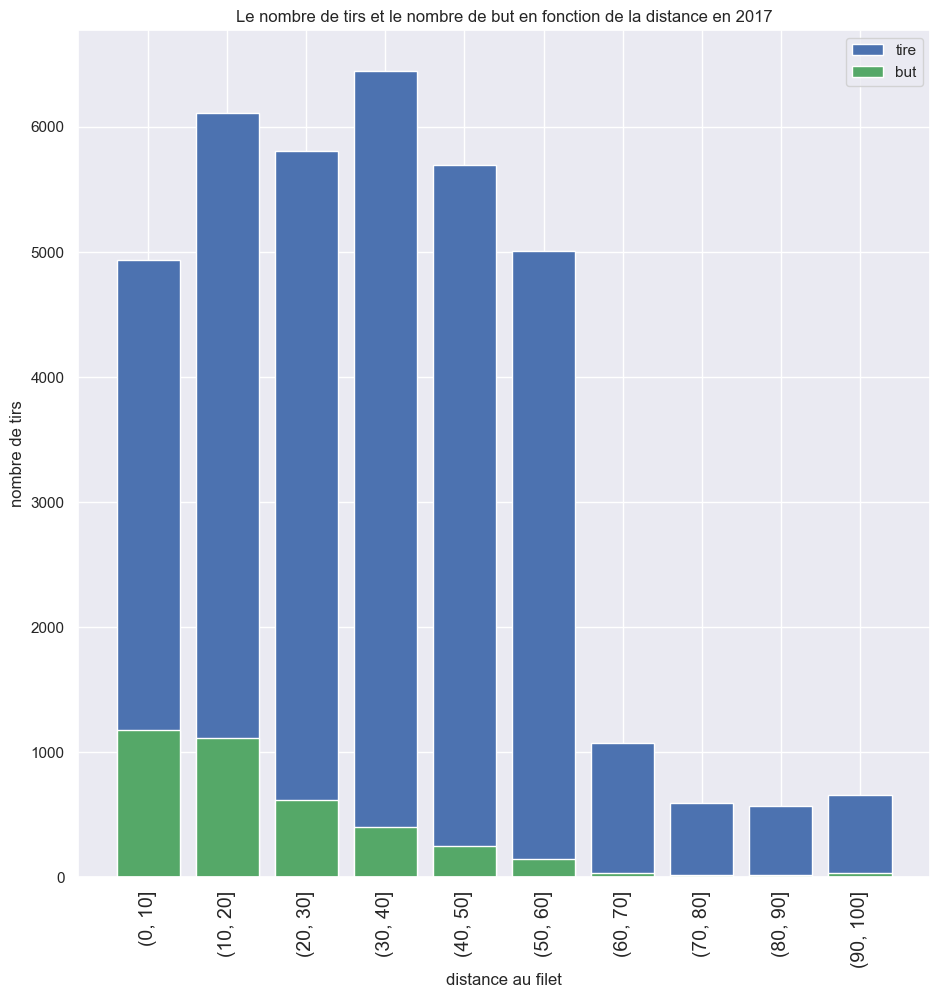

In [6]:
goal_by_distance(df_season_2017, data_extractor, 2017)

In [8]:
data_extractor = DataExtractor()
df_season_2018 = data_extractor.get_season_into_dataframe('../notebooks/hockey/Season20182019/season20182019.json')

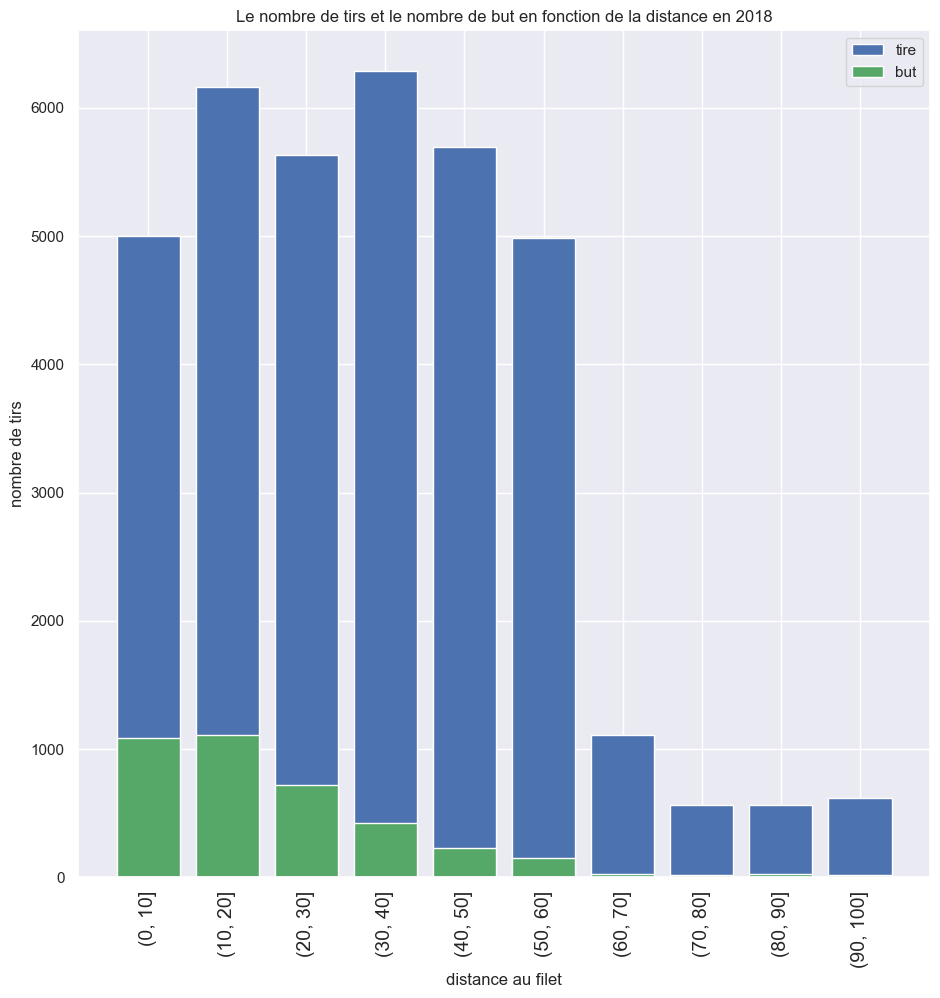

In [9]:
goal_by_distance(df_season_2018, data_extractor, 2018)